## ABSTRACT

To expand the basic code for building a DNN on the Pima Indian Diabetic Dataset to include:

(a) pre-process the data by scaling/standardizing the 8 columns

(b) Split the entire dataset into three parts instead of two as we currently do. One is train, two is validation, and then a test set. Build DNN model with train data, tune hyper parameters with validation data, and finally evaluate performance on the test data.

(c) Make Epoch versus train set accuracy, and validation set accuracy

(d) Report results using nice ROC curves, report AUC values. Feel free to use code form our course,or from elsewhere

To train, tune and evaluate DNN model for the Black Friday sales Dataset. https://www.kaggle.com/mehdidag/black-friday. It’s a regression problem and you need only one neuron in the final layer!!! Try all the above steps (for problem 1) on this one too.

### About the dataset "PIMA INDIAN DIABETIC DATASET"

### Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## PART 1

1. Understand the problem and read in the data
2. Pre-process data, train-test split
3. Build and compile a deep learning model

# Understand the problem and read in the data

This Kaggle challenge is about predicting the onset of diabetes in 5 years or less. Target variable is Outcome. 1 = yes, the person became diabetic in 5 years, and 0 = No, the person did not. This is a binary classification problem. Please check out the Kaggle link here to see feature details - https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [0]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

In [164]:
%pwd

'/content'

In [165]:
!ls

'pima-indians-diabetes(2).data'   sample_data


In [166]:
from google.colab import files
uploaded = files.upload()

In [167]:
df = pd.read_csv('pima-indians-diabetes(2).data',header = None)
print(df.shape)
df.head(2)

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


### Performing EDA

In [168]:
#Check null values & how many numerical and categorical features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
0    768 non-null int64
1    768 non-null int64
2    768 non-null int64
3    768 non-null int64
4    768 non-null int64
5    768 non-null float64
6    768 non-null float64
7    768 non-null int64
8    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No Null Values and All are numerical values

In [169]:
#the min and max values
df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


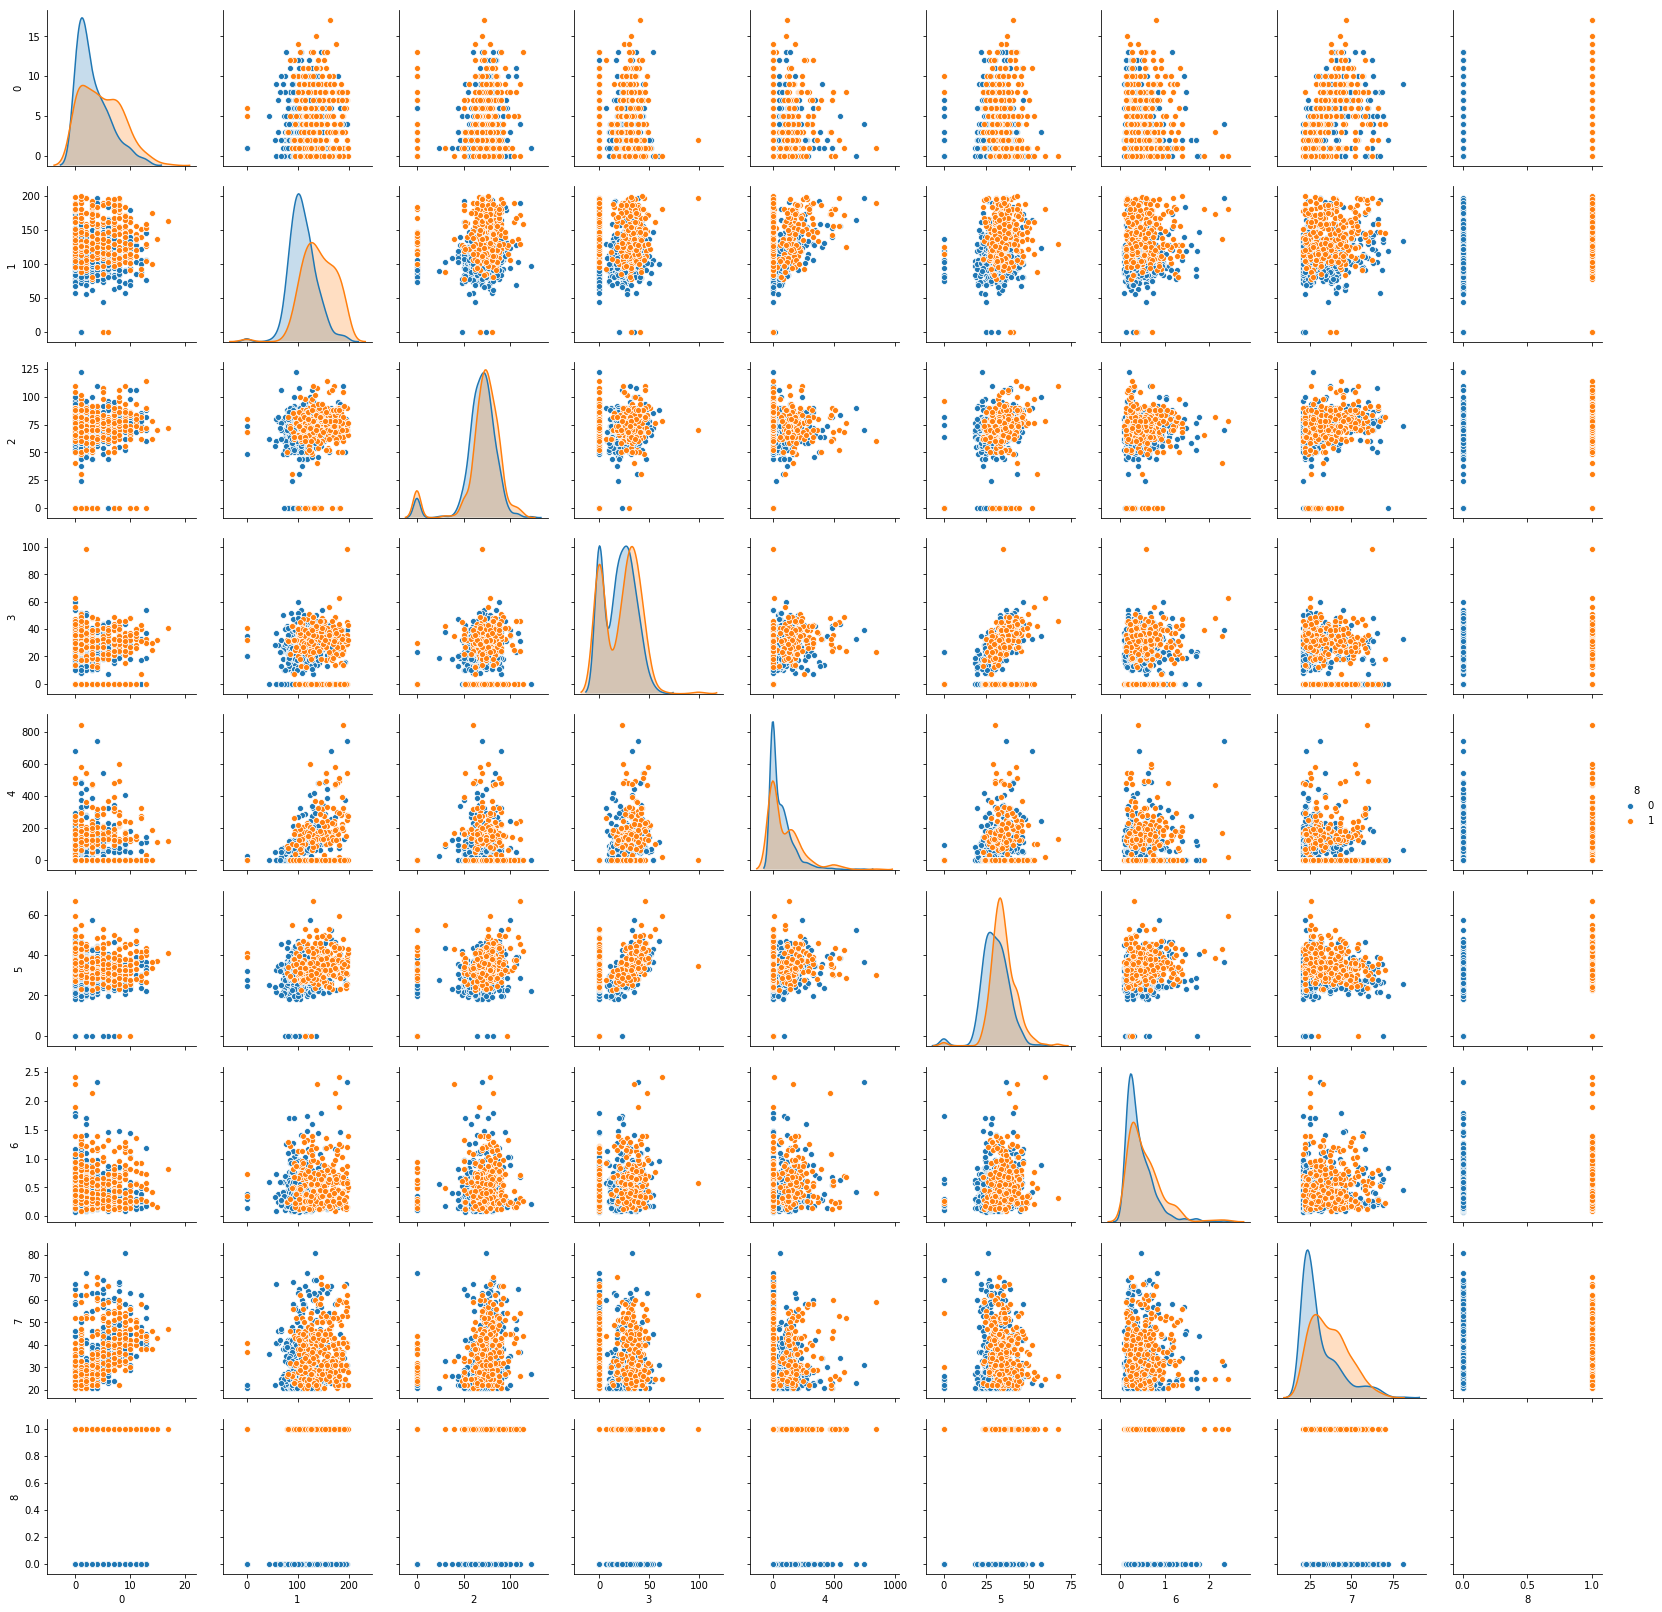

In [170]:
sns.pairplot(df,hue= 8)

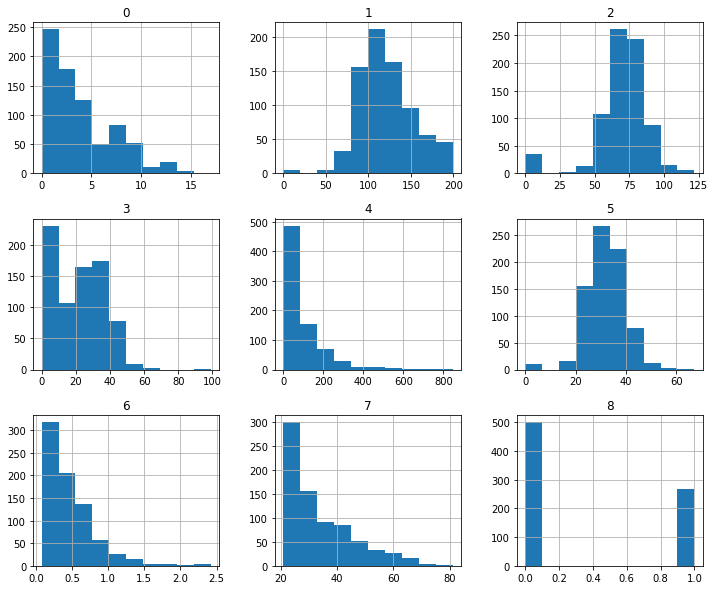

In [171]:
#Build a histogram of all KPIs together
_=df.hist(figsize=(12,10))

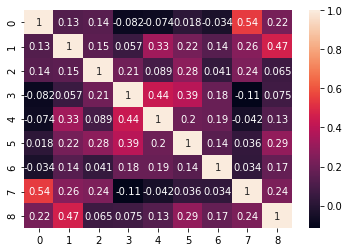

In [172]:
#Find the correation between the variables
sns.heatmap(df.corr(),annot=True)

7 and 0 are correlated (0.54); 3 and 4 are correlated.

Also 1 is correlated with 8

### Pre-process data, train-test and validation split

### Splitting the data into train, test and validation sets

In [0]:
#Separate out X and Y

X = df.iloc[:, :8]
y = df.iloc[:, 8:9]

### Scaling the data by using standard scalar

In [0]:
#Since variables have varied scale, we would rescale all of them, using Standard Scalar
#StandardScalar subtracts mean from all the values and divide by SD, so we scale all the values to mean = 0 and sd = 1

from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

In [175]:
sc= StandardScaler()
X_scaled =pd.DataFrame(sc.fit_transform(X))

X_scaled.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [0]:
(X_train, X_test, y_train, y_test) = train_test_split(
    X_scaled, y, test_size=0.2, random_state=1)
(X_train, X_val, y_train, y_val) = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

In this way, train, val, test set will be 60%, 20%, 20% of the dataset respectively.

In [177]:
print(X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape)

(460, 8) (154, 8) (154, 8) (460, 1) (154, 1) (154, 1)


# Build and compile a deep learning model

In [178]:
# Build the deep neural network
model = Sequential()
model.add(Dense(10, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=8, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [0]:
# Compile the DNN

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from matplotlib import pyplot as plt

Train on 460 samples, validate on 154 samples
Epoch 1/100
215/460 [=============>................] - ETA: 0s - loss: 0.4040 - acc: 0.8233

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


460/460 [==============================] - 0s 898us/step - loss: 0.3909 - acc: 0.8196 - val_loss: 0.5395 - val_acc: 0.7338
Epoch 2/100
460/460 [==============================] - 0s 863us/step - loss: 0.3887 - acc: 0.8196 - val_loss: 0.5421 - val_acc: 0.7338
Epoch 3/100
460/460 [==============================] - 0s 880us/step - loss: 0.3900 - acc: 0.8109 - val_loss: 0.5422 - val_acc: 0.7338
Epoch 4/100
460/460 [==============================] - 0s 875us/step - loss: 0.3896 - acc: 0.8130 - val_loss: 0.5421 - val_acc: 0.7273
Epoch 5/100
460/460 [==============================] - 0s 842us/step - loss: 0.3884 - acc: 0.8087 - val_loss: 0.5430 - val_acc: 0.7273
Epoch 6/100
460/460 [==============================] - 0s 905us/step - loss: 0.3883 - acc: 0.8065 - val_loss: 0.5430 - val_acc: 0.7273
Epoch 7/100
460/460 [==============================] - 0s 912us/step - loss: 0.3882 - acc: 0.8087 - val_loss: 0.5456 - val_acc: 0.7273
Epoch 8/100
460/460 [==============================] - 0s 856us/ste

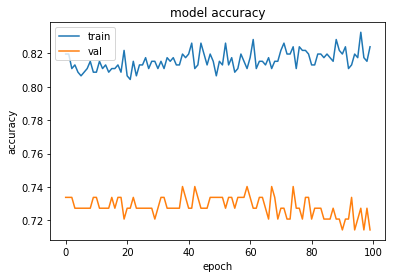

In [197]:
# Fit the DNN with your train data

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), nb_epoch=100, batch_size=5)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc = 'upper left')
plt.show()




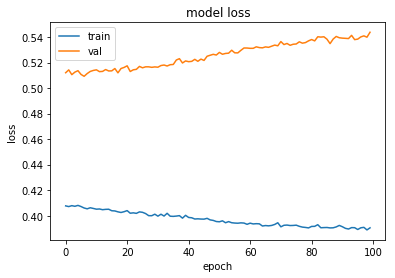

In [196]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


To find out if their model is overfitting, data scientists use a technique called cross-validation, where they split their data into two parts - the training set, and the validation set. The training set is used to train the model, while the validation set is only used to evaluate the model's performance.

Metrics on the training set let you see how your model is progressing in terms of it's training, but it's metrics on the validation set that let you get a measure of the quality of your model - how well it's able to make new predictions based on data it hasn't seen before.

With this in mind, loss and acc are measures of loss and accuracy on the training set, while val_loss and val_acc are measures of loss and accuracy on the validation set.

At the moment the dnn model has an accuracy of ~82.39% on the training set and ~71.43% on the validation set. This means that you can expect your model to perform with ~71.43% accuracy on new data.

I notice that as your epochs goes from 40 to 100, your acc metric increases, while your val_acc metric decreases. This means that your model is fitting the training set better, but is losing it's ability to predict on new data, indicating that your model is starting to fit on noise and is beginning to overfit.

## Evaluating the model on the test set

In [200]:

scores = model.evaluate(X_test, y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

154/154 [==============================] - 0s 180us/step
Accuracy: 79.87%


## To plot the auc and roc curves

### What are ROC and AUC and what can they do?

Receiver operating characteristic curve a.k.a ROC is a graphic plot illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The critical point here is "binary classifier" and "varying threshold". I will show you how to plot ROC for multi-label classifier by the one-vs-all approach as well.

Area Under the Curve, a.k.a. AUC is the percentage of this area that is under this ROC curve, ranging between 0~1.  

What can they do?

ROC is a great way to visualize the performance of a binary classifier, and AUC is one single number to summarize a classifier's performance by assessing the ranking regarding separation of the two classes. The higher, the better.

In the following two sections, I will show you how to plot the ROC and calculate the AUC for Keras classifiers, both binary and multi-label ones.

### ROC, AUC for binary classifiers

To calculate the ROC value

We can call sklearn's roc_curve() function to generate the two. Here is the code to make them happen.

In [0]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

AUC value can also be calculated like this.

In [0]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

To make the plot looks more meaningful, let's train another binary classifier(Random forest) and compare it with our Keras classifier later in the same plot.

In [204]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Now, let's plot the ROC for the two classifiers.

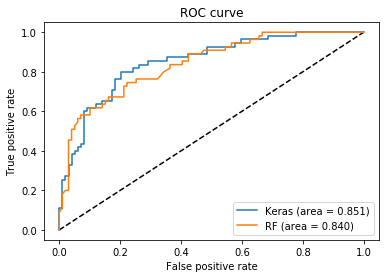

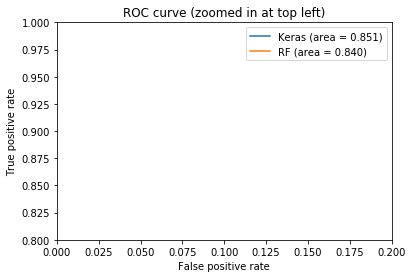

In [205]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

As you can see, given the AUC metric, Keras classifier outperforms the other random forest classifier.

## Conclusion : 

Standard scalar was used in order to pre process the data in order to uniformly scale the complete dataset.It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values). This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better. 

The dataset was divided into three sets : train, test and validation and deep neural network model was built using the train data set by tuning the hyper parameter with the validation data and finally the performance was evaluated on the test data set. The accuracy found was 79.87 %.

The plots of epoch versus the train set accuracy and validation set accuracy as well as epoch versus train set loss and test set loss were plotted and it was found that as epoch goes from 40 to 100, your acc metric increases, while your val_acc metric decreases. This means that your model is fitting the training set better, but is losing it's ability to predict on new data, indicating that your model is starting to fit on noise and is beginning to overfit.

Finally, Receiver Operating Characteristic Curve was plotted for Random forest classifier as well as the keras classifier and it was found that the keras classifier was a better classifier in terms of performance.

## Contribution Statement :

Did the following :

1. Normal EDA 
2. Preprocessing of the data using Standard Scaler
3. Building of DNN model on train set, tuning it on the validation set and testing it on the test set.
4. Plotting of the ROC and AUC curves and rectifying the best binary classifier model.

Code by self -------- 60%

Code referred ------- 40%

## Citations:

Standard scaler -------- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Information about DNN ---------- https://skymind.com/wiki/neural-network

Information about dataset ------------ https://www.kaggle.com

Information about ROC curves for DNN ---------- https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/

## License:

Copyright <2019> Ria Rajput Permission is hereby granted, free of charge, to any person obtaining a copy of this notebook and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.